In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle
import cvxpy as cp

In [24]:
# data generation
rng = np.random.default_rng(5)
n = 10
radius = rng.uniform(1.0, 3.0, n)
init_centers = rng.uniform(-5.0, 5.0, (2, n))

In [28]:
# build and solve optimization problem
centers = cp.Variable((n, 2), name='c')
constraints = []
for i in range(n - 1):
    constraints += [cp.sum((centers[i, :] - centers[i+1:, :]) ** 2, axis=1) >=
                     (radius[i] + radius[i+1:]) ** 2]

# initialize centers to random locations
centers.value = init_centers.T

obj = cp.Minimize(cp.max(cp.norm_inf(centers, axis=1) + radius))
prob = cp.Problem(obj, constraints)
prob.solve(solver=cp.IPOPT, nlp=True, verbose=True, derivative_test='none',
              least_square_init_duals='no')

(CVXPY) Nov 11 09:52:53 AM: Your problem has 20 variables, 45 constraints, and 0 parameters.
(CVXPY) Nov 11 09:52:53 AM: It is compliant with the following grammars: 
(CVXPY) Nov 11 09:52:53 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Nov 11 09:52:53 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Nov 11 09:52:53 AM: Your problem is compiled with the CPP canonicalization backend.


                                     CVXPY                                     
                             v1.7.0.dev0+0.5870139                             
This is Ipopt version 3.11.9, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      270
Number of nonzeros in inequality constraint Jacobian.:      190
Number of nonzeros in Lagrangian Hessian.............:       90

Total number of variables............................:      121
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       90
Total number of inequality constraints...............:       95
        inequality constraints with only lower bounds:       95
   inequality constraints with lower and upper bounds:  

6.455167855929289

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  40  6.4552358e+00 1.78e-15 9.43e-06  -5.5 2.29e-01    -  1.00e+00 9.90e-01h  1
  41  6.4551680e+00 1.78e-15 1.15e-08  -7.6 1.10e-02    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 41

                                   (scaled)                 (unscaled)
Objective...............:   6.4551680361963131e+00    6.4551680361963131e+00
Dual infeasibility......:   1.1484850431786597e-08    1.1484850431786597e-08
Constraint violation....:   1.7763568394002505e-15    1.7763568394002505e-15
Complementarity.........:   2.7455734273763480e-08    2.7455734273763480e-08
Overall NLP error.......:   2.7455734273763480e-08    2.7455734273763480e-08


Number of objective function evaluations             = 46
Number of objective gradient evaluations             = 42
Number of equality constraint evaluations            = 46
Number of inequality constraint evaluations          = 46
Number of equality constraint Jacobi

In [ ]:
# build and solve optimization problem
centers = cp.Variable((2, n), name='c')
constraints = []
for i in range(n - 1):
    for j in range(i + 1, n):
       constraints += [cp.sum(cp.square(centers[:, i] - centers[:, j])) >=
                         (radius[i] + radius[j]) ** 2]

# initialize centers to random locations
centers.value = init_centers#rng.uniform(-5.0, 5.0, (2, n))

obj = cp.Minimize(cp.max(cp.norm_inf(centers, axis=0) + radius))
prob = cp.Problem(obj, constraints)
prob.solve(solver=cp.IPOPT, nlp=True, verbose=True, derivative_test='none',
              least_square_init_duals='no')

Circle packing (ratio=0.740)


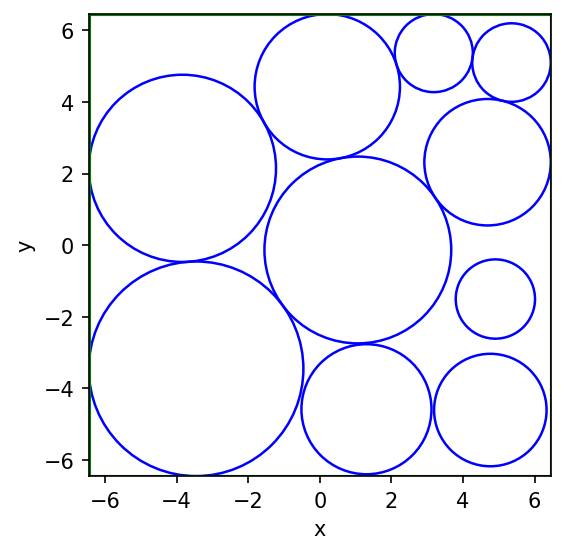

In [20]:
# plot circles
centers = centers.value.T
#centers = centers.value
L = prob.value 

square_size = float(L) * 2
pi = np.pi
ratio = pi * np.sum(np.square(radius)) / (square_size**2)

# create plot to visualize the packing
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_aspect("equal", adjustable="box")
fig.set_dpi(150)

# draw circles
for i in range(n):
    x_val = centers[0, i]
    y_val = centers[1, i]
    if x_val is None or y_val is None:
        msg = f"Circle center value not assigned for index {i}."
        raise ValueError(msg)
    circle = Circle(
        (float(x_val), float(y_val)),  # (x, y) center
        radius[i],  # radius
        fill=False,  # outline only
        ec="b",
        lw=1.2,  # edge color/width
    )
    ax.add_patch(circle)

# draw square border
border = Rectangle(
    (-square_size / 2, -square_size / 2),  # bottom-left
    square_size,
    square_size,  # width, height
    fill=False,
    ec="g",
    lw=1.5,
)
ax.add_patch(border)

# limits and cosmetics
ax.set_xlim(float(-square_size / 2), float(square_size / 2))
ax.set_ylim(float(-square_size / 2), float(square_size / 2))
ax.set_xlabel("x")
ax.set_ylabel("y")
#ax.set_title(f"Circle packing (ratio={ratio:.3f})")
print(f"Circle packing (ratio={ratio:.3f})")
plt.show()